# House prices

use training data (train.csv) to train a regression model


In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [23]:
def loss(h, y):
    sq_error = (h - y)**2
    n = len(y)
    return 1.0 / (2*n) * sq_error.sum()

In [24]:
class LinearRegression:
  
    def predict(self, X):
        return np.dot(X, self._W)

    def _gradient_descent_step(self, X, targets, lr):

        predictions = self.predict(X)

        error = predictions - targets
        gradient = np.dot(X.T,  error) / len(X)

        self._W -= lr * gradient

    def fit(self, X, y, n_iter=100000, lr=0.01):

        self._W = np.zeros(X.shape[1])

        self._cost_history = []
        self._w_history = [self._W]
        for i in range(n_iter):

            prediction = self.predict(X)
            cost = loss(prediction, y)

            self._cost_history.append(cost)

            self._gradient_descent_step(X, y, lr)

            self._w_history.append(self._W.copy())
        return self


In [25]:
def features_scaling(x):
    x = (x - x.mean()) / x.std()
    x = np.c_[np.ones(x.shape[0]), x]
    return x

In [26]:
df = pd.read_csv("train.csv")
df.head()


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [27]:
x = df['GrLivArea']
y = df['SalePrice']

x = features_scaling(x)

In [28]:
reg = LinearRegression()
reg.fit(x, y, n_iter=2000, lr=0.01)

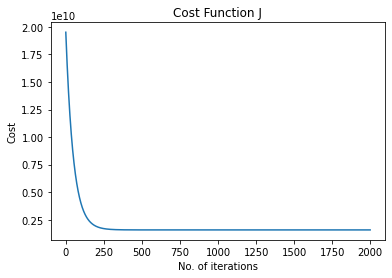

In [29]:
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(reg._cost_history)
plt.show()

In [30]:
#Animation

#Set the plot up,
fig = plt.figure()
ax = plt.axes()
plt.title('Sale Price vs Living Area')
plt.xlabel('Living Area in square feet (normalised)')
plt.ylabel('Sale Price ($)')
plt.scatter(x[:,1], y)
line, = ax.plot([], [], lw=2, color='red')
annotation = ax.text(-1, 700000, '')
annotation.set_animated(True)
plt.close()

#Generate the animation data,
def init():
    line.set_data([], [])
    annotation.set_text('')
    return line, annotation

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(-5, 20, 1000)
    y = reg._w_history[i][1]*x + reg._w_history[i][0]
    line.set_data(x, y)
    annotation.set_text('Cost = %.2f e10' % (reg._cost_history[i]/10000000000))
    return line, annotation

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=300, interval=10, blit=True)

rc('animation', html='jshtml')

anim

In [192]:
#df_binary = df[['LotArea', 'MSSubClass', 'SalePrice',
 #               'LotFrontage', 'OverallCond', 'SaleCondition', 'OverallQual']]
# df_binary = df_binary[(df_binary['LotArea'] < 30000) & (
  #  df_binary['SalePrice'] < 200000) & (df_binary['SaleCondition'] == 'Normal')]
#df_binary['score'] = df_binary['LotArea'] / 3000 + df_binary['MSSubClass'] / \
 #   10 + df_binary['LotFrontage'] / 10 + df_binary['OverallQual']
# df_binary = df_binary[(df_binary['score'] < 30)]
# df_binary.head()


LotArea  MSSubClass  SalePrice  LotFrontage  OverallCond SaleCondition  \
1      9600          20     181500         80.0            8        Normal   
5     14115          50     143000         85.0            5        Normal   
10    11200          20     129500         70.0            5        Normal   
15     6120          45     132000         51.0            8        Normal   
17    10791          90      90000         72.0            5        Normal   

    OverallQual      score  
1             6  19.200000  
5             5  23.205000  
10            5  17.733333  
15            7  18.640000  
17            4  23.797000

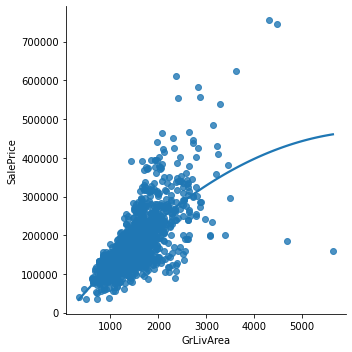

In [35]:
sns.lmplot(x="GrLivArea", y="SalePrice", data=df, order=2, ci=None)


In [40]:
df.fillna(method='ffill', inplace=True)


In [41]:
X = np.array(df['GrLivArea']).reshape(-1, 1)
y = np.array(df['SalePrice'])
# Separating the data into independent and dependent variables
# Converting each dataframe into a numpy array
# since each dataframe contains only one column
df.dropna(inplace=True)

# Dropping any rows with Nan values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Splitting the data into training and testing data
regr = LinearRegression()

regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))


0.4996251942253098


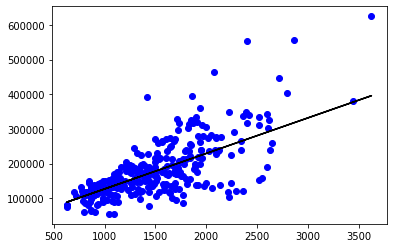

In [42]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color='b')
plt.plot(X_test, y_pred, color='k')

plt.show()
# Data scatter of predicted values
